In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df1=pd.read_csv("C://Users//mahes//Downloads//Type_S.csv") #Read all the 3 files
df2=pd.read_csv("C://Users//mahes//Downloads//Type_H.csv")
df3=pd.read_csv("C://Users//mahes//Downloads//Normal.csv")

In [3]:
print("The shape of Type_S is",df1.shape) #Print shape of all the dataframe
print("The shape of Type_H is",df2.shape)
print("The shape of Normal  is",df3.shape)

The shape of Type_S is (150, 7)
The shape of Type_H is (60, 7)
The shape of Normal  is (100, 7)


In [4]:
column1=df1.shape[0] #Print all the column of data frame
column2=df2.shape[0]
column3=df3.shape[0]
print("The total column of Type_S is",column1)
print("The total column of Type_H is",column2)
print("The total column of Normal  is",column3)

The total column of Type_S is 150
The total column of Type_H is 60
The total column of Normal  is 100


In [5]:
print(df1.columns) #Getting the column name of all the data frame
print(df2.columns)
print(df3.columns)

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [6]:
df1.head()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [7]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [8]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


Based on the above tables, we can conclude its stating about the same parameter but the class type differs


In [9]:
print("The data type for Type_s is",df1.dtypes) #Print the data types of dataframe 1

The data type for Type_s is P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [10]:
print("The data type for Type_H is",df2.dtypes) #Print the data type of dataframe2

The data type for Type_H is P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [11]:
print("The data type for Normal is",df3.dtypes) #Print the data type of dataframe 3

The data type for Normal is P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


As observed from the above datatype class is a object data type since its specify about what class the data belongs to

In [12]:
df1['Class'] = df1['Class'].replace(to_replace=['tp_s', 'Type_S'], value='type_s')  #Unify the columns of df1
df1.head()             

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_s
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,type_s
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,type_s
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,type_s
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,type_s


In [14]:
df2['Class'] = df2['Class'].replace(to_replace=['tp_h', 'Type_H'], value='type_h')  #Unify the columns of df2
df2.tail()   

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,type_h
56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,type_h
57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,type_h
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,type_h
59,48.109236,14.930725,35.564683,33.178512,124.056452,7.947905,type_h


In [15]:
df3['Class'] = df3['Class'].replace(to_replace=['Nrmal'], value='Normal')  #Unify the columns of df2
df3.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
97,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
99,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [16]:
df4=pd.concat([df1, df2, df3],axis=0) #Combine all three dataframe
df4

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_s
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,type_s
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,type_s
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,type_s
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,type_s
...,...,...,...,...,...,...,...
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
97,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [17]:
df4.reset_index(drop=True,inplace=True) #Reset the index value

In [18]:
df4.shape

(310, 7)

In [19]:
row = df4.sample(n = 5)
row

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
54,80.988074,36.843172,86.960602,44.144903,141.088149,85.872152,type_s
249,50.753290,20.235060,37.000000,30.518231,122.343516,2.288488,Normal
216,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,Normal
67,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,type_s
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_s


In [20]:
df4.isnull().sum()/len(df4)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [21]:
df4.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [22]:
df4.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


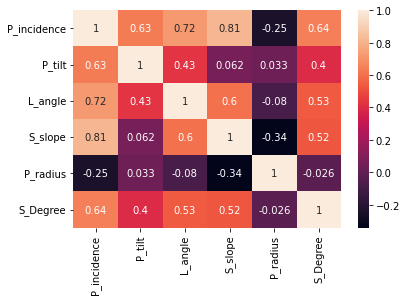

In [23]:
sns.heatmap(data=df4.corr(),annot=True)
plt.show()

The S_slope and p_incidence is strongly correlated(Positive correlated as it is above 65
P_incidence and S_slope is again strongly corrrelated
L-angle and p_incidence are strongly correlated
class and p_incidence are weakly correlated
L-angle and class is weakly correlated

In other terms as shown in the heatplot the box which are light in color are strongly correlated and darker boxes are weakly correlated


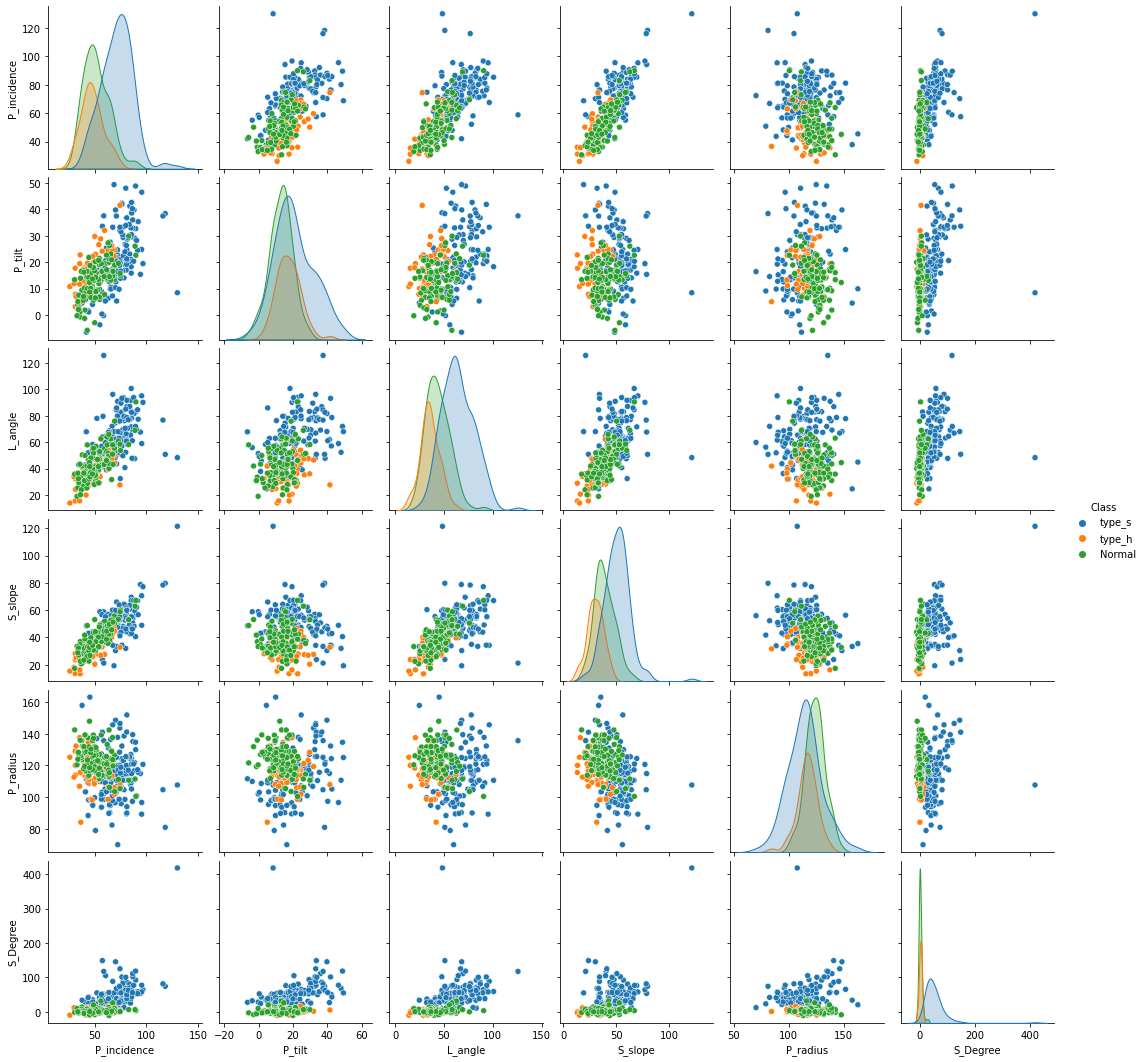

In [24]:
sns.pairplot(df4,hue="Class")

Pair plot shold be drawn for neumerical values.
From the above pair plot I can see that
Correlation between all the three classes is stated 
No Linear relationship for the following field:
P_radius and P_incidence
P_radius and S_slope
Positve relationship for the folloing:
L_angle and P_incidece 
S_Slope and P_incidence

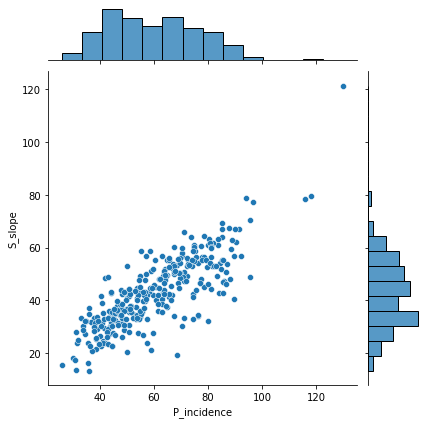

In [25]:
sns.jointplot(data=df4,x='P_incidence',y='S_slope')

Joint plot is the combination plot. 
There is a positive relationship between P_incidence and S_slope
Also the histogram is right skewed

<AxesSubplot:>

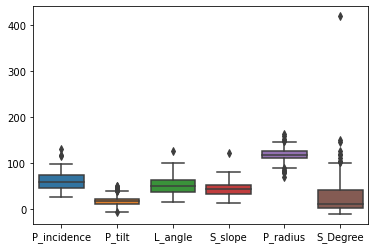

In [26]:
sns.boxplot(data=df4)

From box plot can see few outliers for all the field
The median of the each fiels is visible


In [30]:
X = df4.drop(('Class'), axis=1)
Y=df4['Class']     #split the data


In [31]:
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972


In [29]:
Y.head()

0    type_s
1    type_s
2    type_s
3    type_s
4    type_s
Name: Class, dtype: object

In [32]:
XScaled  = X.apply(zscore)
XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-7.664120e-17,-2.206121e-16,4.444473e-16,-3.581365e-16,5.579766e-16,7.735748e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


In [33]:
X_train, X_test, y_train,y_test = train_test_split(XScaled, Y, test_size=0.20, random_state=42) 

In [34]:
NNH = KNeighborsClassifier()

In [35]:
NNH.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred_train=NNH.predict(X_train) 

In [37]:
NNH.score(X_test,y_test)

0.8387096774193549

In [38]:
y_pred_test=NNH.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [40]:
from sklearn import metrics

In [41]:
cm = metrics.confusion_matrix(y_test, y_pred_test)

In [42]:
cm_df = pd.DataFrame(cm,
                     index = ['Type_S','Type_H','Normal'], 
                     columns = ['Type_S','Type_H','Normal'])

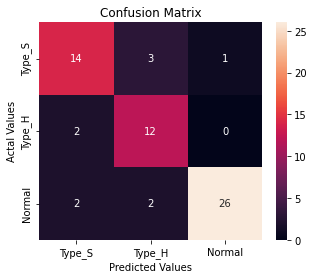

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [44]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      Normal       0.78      0.78      0.78        18
      type_h       0.71      0.86      0.77        14
      type_s       0.96      0.87      0.91        30

    accuracy                           0.84        62
   macro avg       0.82      0.83      0.82        62
weighted avg       0.85      0.84      0.84        62



In [45]:
from sklearn.metrics import classification_report

In [46]:
# Classification matrix in another way
Micro_precision=metrics.precision_score(y_test, y_pred_test, average='micro')
Micro_recall=metrics.precision_score(y_test, y_pred_test, average='micro')
Micro_F1_Score=metrics.f1_score(y_test, y_pred_test, average='micro')
Macro_precision=metrics.precision_score(y_test, y_pred_test, average='macro')
Macro_recall=metrics.precision_score(y_test, y_pred_test, average='macro')
Macro_F1_Score=metrics.f1_score(y_test, y_pred_test, average='macro')
Weighted_precision=metrics.precision_score(y_test, y_pred_test, average='weighted')
Weighted_recall=metrics.precision_score(y_test, y_pred_test, average='weighted')
Weighted_F1_Score=metrics.f1_score(y_test, y_pred_test, average='weighted')


In [47]:
#Print all the possible metrix
print("Micro precision",Micro_precision)
print("Micro recall",Micro_recall)
print("Micro F1_Score",Micro_F1_Score)
print("Macro precision",Macro_precision)
print("Micro recall",Macro_recall)
print("Macro F1_Score",Macro_F1_Score)
print("Weighted precision",Weighted_precision)
print("Weighted recall",Weighted_recall)
print("Weighted F1_Score",Weighted_F1_Score)
print(classification_report(y_test, y_pred_test))

Micro precision 0.8387096774193549
Micro recall 0.8387096774193549
Micro F1_Score 0.8387096774193549
Macro precision 0.8155410312273057
Micro recall 0.8155410312273057
Macro F1_Score 0.8214173426397536
Weighted precision 0.8511490617752477
Weighted recall 0.8511490617752477
Weighted F1_Score 0.8420504956459828
              precision    recall  f1-score   support

      Normal       0.78      0.78      0.78        18
      type_h       0.71      0.86      0.77        14
      type_s       0.96      0.87      0.91        30

    accuracy                           0.84        62
   macro avg       0.82      0.83      0.82        62
weighted avg       0.85      0.84      0.84        62



In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
r_ange=np.arange(1,50)
scores =[]
for k in r_ange:
    NNH = KNeighborsClassifier(p = k , weights='distance')
    NNH.fit(X_train, y_train)
    y_hat_test=NNH.predict(X_test)
    score=accuracy_score(y_test,y_hat_test)
    scores.append(score)
MSE=[1 - x for x in scores]
op_k=r_ange[MSE.index(min(MSE))]
print(op_k)
NNH.score(X_test, y_hat_test)

2


1.0

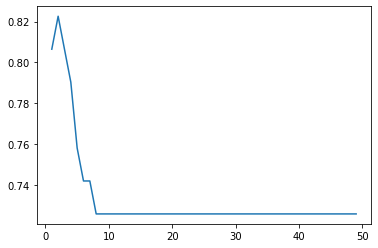

In [50]:
plt.plot(range(1,50),scores)

In [51]:
knn= KNeighborsClassifier(n_neighbors=op_k)

In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 289 to 158
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  62 non-null     float64
 1   P_tilt       62 non-null     float64
 2   L_angle      62 non-null     float64
 3   S_slope      62 non-null     float64
 4   P_radius     62 non-null     float64
 5   S_Degree     62 non-null     float64
dtypes: float64(6)
memory usage: 3.4 KB


In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [54]:
y_pred_train_new=NNH.predict(X_train) 

In [55]:
y_pred_test_new=NNH.predict(X_test) 

In [56]:
NNH.score(X_test,y_pred_test)

0.8870967741935484

In [57]:
print(metrics.classification_report(y_test,y_pred_test_new))

              precision    recall  f1-score   support

      Normal       0.60      0.67      0.63        18
      type_h       0.54      0.50      0.52        14
      type_s       0.90      0.87      0.88        30

    accuracy                           0.73        62
   macro avg       0.68      0.68      0.68        62
weighted avg       0.73      0.73      0.73        62



From Score i can conclude that base model lackes
From classification point of view my base model is better because its recall and precision is better in base model


PART B

In [3]:
data1=pd.read_csv("C://Users//mahes//Downloads//Data1.csv") #Read the dataset1

In [4]:
data2=pd.read_csv("C://Users//mahes//Downloads//Data2.csv") #Read the dataset2

In [5]:
data1.shape #Print the rows and columns of the data frame

(5000, 8)

In [6]:
data1.columns #Print column name

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [7]:
data1.dtypes #Print data type

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [8]:
data2.shape

(5000, 7)

In [9]:
data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [10]:
data2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [11]:
data3=pd.merge(data1, data2, on ='ID' , how = "inner") #Merge two data frame into data3

In [12]:
data3.reset_index(drop=True,inplace=True) #Reset index once the frame is merged


In [13]:
data3.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [14]:
convert_dict = {'CreditCard': object,'InternetBanking': object,'FixedDepositAccount': object,'Security':object,'Level' : object,'HiddenScore':object}
data3 =data3.astype(convert_dict)
data3.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

C:\Users\mahes\anaconda3\an\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanOnCard', ylabel='Density'>

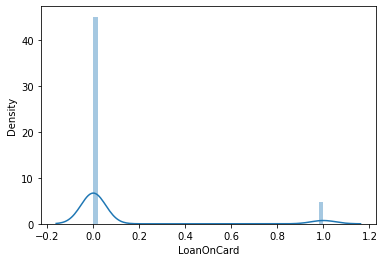

In [15]:
sns.distplot(data3['LoanOnCard'])

From the above histogram i can conclude loan on the card is higher mean. More people didnt pay the loan

In [16]:
data3.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [17]:
for value in ['ID','Age','CustomerSince','HighestSpend','ZipCode','HiddenScore','MonthlyAverageSpend','Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']:
    print(value,":", sum(data3[value] == '?')) #Checkinf for unexpected values if any

ID : 0
Age : 0
CustomerSince : 0
HighestSpend : 0
ZipCode : 0
HiddenScore : 0
MonthlyAverageSpend : 0
Level : 0
Mortgage : 0
Security : 0
FixedDepositAccount : 0
InternetBanking : 0
CreditCard : 0
LoanOnCard : 0


There is no unexpected missing values

In [18]:
data3['LoanOnCard'] = data3['LoanOnCard'].fillna(data3['LoanOnCard'].mode()[0]) #Imputting by mode method since it is catagorical value

In [19]:
data3.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [20]:
data3['LoanOnCard'].head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: LoanOnCard, dtype: float64

In [21]:
data3 = pd.get_dummies(data3,columns = ['Security', 'FixedDepositAccount','InternetBanking','CreditCard','Level','HiddenScore'])

C:\Users\mahes\anaconda3\an\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [22]:
data3.dtypes

ID                         int64
Age                        int64
CustomerSince              int64
HighestSpend               int64
ZipCode                    int64
MonthlyAverageSpend      float64
Mortgage                   int64
LoanOnCard               float64
Security_0                 uint8
Security_1                 uint8
FixedDepositAccount_0      uint8
FixedDepositAccount_1      uint8
InternetBanking_0          uint8
InternetBanking_1          uint8
CreditCard_0               uint8
CreditCard_1               uint8
Level_1                    uint8
Level_2                    uint8
Level_3                    uint8
HiddenScore_1              uint8
HiddenScore_2              uint8
HiddenScore_3              uint8
HiddenScore_4              uint8
dtype: object

In [23]:
data3.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard,Security_0,Security_1,...,InternetBanking_1,CreditCard_0,CreditCard_1,Level_1,Level_2,Level_3,HiddenScore_1,HiddenScore_2,HiddenScore_3,HiddenScore_4
0,1,25,1,49,91107,1.6,0,0.0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,1.5,0,0.0,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3,39,15,11,94720,1.0,0,0.0,1,0,...,0,1,0,1,0,0,1,0,0,0
3,4,35,9,100,94112,2.7,0,0.0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,5,35,8,45,91330,1.0,0,0.0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [24]:
x= data3.drop(['ZipCode','ID','LoanOnCard','Security_1','InternetBanking_1','CreditCard_1','Level_3','HiddenScore_4'], axis=1)
y=data3['LoanOnCard']  #Split the data 

In [25]:
x.head(5)

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,Security_0,FixedDepositAccount_0,FixedDepositAccount_1,InternetBanking_0,CreditCard_0,Level_1,Level_2,HiddenScore_1,HiddenScore_2,HiddenScore_3
0,25,1,49,1.6,0,0,1,0,1,1,1,0,0,0,0
1,45,19,34,1.5,0,0,1,0,1,1,1,0,0,0,1
2,39,15,11,1.0,0,1,1,0,1,1,1,0,1,0,0
3,35,9,100,2.7,0,1,1,0,1,1,0,1,1,0,0
4,35,8,45,1.0,0,1,1,0,1,0,0,1,0,0,0


In [26]:
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: LoanOnCard, dtype: float64

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.25, random_state=1) 

In [28]:
x_train.shape

(3750, 15)

In [29]:
y_train.shape

(3750,)

In [30]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train , y_train)

LogisticRegression(solver='liblinear')

In [32]:
y_predict = model.predict(x_test) #Predict the data

In [33]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5        6  \
0 -0.223544  0.225754  0.059143  0.206626  0.001052  0.700977 -2.10212   

         7         8         9        10        11        12        13  \
0  0.90029  0.493099  0.678361 -4.039886 -0.255096 -1.354956 -1.556363   

         14  intercept  
0  0.731427  -1.201829  


In [34]:
model_score = model.score(x_test, y_test)
print(model_score)

0.956


<AxesSubplot:>

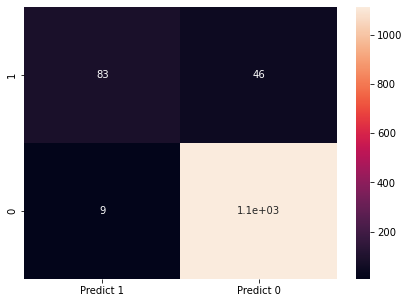

In [35]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

True positive : 83
True negative: 113
Type I:  9
Type II : 46

In [36]:
#Printing evalution metrix
Accuracy = metrics.accuracy_score(y_test,y_predict)
Precision = metrics.precision_score(y_test, y_predict)
Sensitivity_recall = metrics.recall_score(y_test, y_predict)
Specificity = metrics.recall_score(y_test, y_predict, pos_label=0)
F1_score = metrics.f1_score(y_test, y_predict)

In [37]:
print("The Accuracy is :",Accuracy)
print("The Precision is :",Precision)
print("The Sensitivity is :",Sensitivity_recall)
print("The Specificity is :",Specificity)
print("The F2_Score is :",F1_score)

The Accuracy is : 0.956
The Precision is : 0.9021739130434783
The Sensitivity is : 0.6434108527131783
The Specificity is : 0.991971454058876
The F2_Score is : 0.751131221719457


In [38]:
data3['LoanOnCard'].value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

C:\Users\mahes\anaconda3\an\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

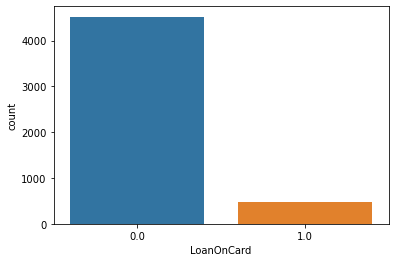

In [39]:
sns.countplot(data3["LoanOnCard"])

In [40]:
!pip install imbalanced-learn

In [41]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.

oversampled_X, oversampled_Y = sm.fit_resample(x_train,y_train)
oversampled_Y.value_counts()

0.0    3399
1.0    3399
Name: LoanOnCard, dtype: int64

In [42]:
model = LogisticRegression(solver="liblinear")
model.fit(oversampled_X,oversampled_Y)

LogisticRegression(solver='liblinear')

In [43]:
model_score = model.score(oversampled_X, oversampled_Y)
print(model_score)

0.9551338629008532


In [44]:
x_test.shape

(1250, 15)

In [45]:
y_predict_new = model.predict(x_test)

In [46]:
len(y_predict_new)

1250

In [47]:
len(y_test)

1250

In [48]:
Accuracy = metrics.accuracy_score(y_test,y_predict_new)
Precision = metrics.precision_score(y_test, y_predict_new)
Sensitivity_recall = metrics.recall_score(y_test, y_predict_new)
Specificity = metrics.recall_score(y_test, y_predict_new, pos_label=0)
F1_score = metrics.f1_score(y_test, y_predict_new)


In [49]:
print("The Accuracy is :",Accuracy)
print("The Precision is :",Precision)
print("The Sensitivity is :",Sensitivity_recall)
print("The Specificity is :",Specificity)
print("The F2_Score is :",F1_score)

The Accuracy is : 0.9392
The Precision is : 0.6962962962962963
The Sensitivity is : 0.7286821705426356
The Specificity is : 0.9634255129348795
The F2_Score is : 0.7121212121212122


My metrics before balancing data is better compared to the metrics after the data is balanced which is clearly showin above



In [50]:
#Train a base model each for SVM
x.head()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,Security_0,FixedDepositAccount_0,FixedDepositAccount_1,InternetBanking_0,CreditCard_0,Level_1,Level_2,HiddenScore_1,HiddenScore_2,HiddenScore_3
0,25,1,49,1.6,0,0,1,0,1,1,1,0,0,0,0
1,45,19,34,1.5,0,0,1,0,1,1,1,0,0,0,1
2,39,15,11,1.0,0,1,1,0,1,1,1,0,1,0,0
3,35,9,100,2.7,0,1,1,0,1,1,0,1,1,0,0
4,35,8,45,1.0,0,1,1,0,1,0,0,1,0,0,0


In [51]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: LoanOnCard, dtype: float64

In [52]:
from sklearn import svm
clf = svm.SVC()  

In [53]:
#Fit the model
clf.fit(oversampled_X , oversampled_Y)

SVC()

In [54]:
y_prediction1 = clf .predict(x_test)

In [55]:
print(clf.score(oversampled_X,oversampled_Y))   #Checking score for train and test data
print(clf.score(x_test,y_test))  

0.8833480435422183
0.8176


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y_prediction1,y_test)) #Printing confussion matrix for the same

Confusion Matrix:
 [[907  14]
 [214 115]]


In [57]:
print(metrics.classification_report(y_test,y_prediction1))

              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      1121
         1.0       0.35      0.89      0.50       129

    accuracy                           0.82      1250
   macro avg       0.67      0.85      0.70      1250
weighted avg       0.92      0.82      0.85      1250



In [58]:
from sklearn.svm import SVC

In [59]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(oversampled_X,oversampled_Y)

prediction = svc_model .predict(x_test)

In [60]:
#Checking accuracy 
print(svc_model.score(oversampled_X, oversampled_Y))
print(svc_model.score(x_test, y_test))

0.9558693733451015
0.9376


In [61]:
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))

Confusion Matrix:
 [[1078   43]
 [  35   94]]


In [62]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1121
         1.0       0.69      0.73      0.71       129

    accuracy                           0.94      1250
   macro avg       0.83      0.85      0.84      1250
weighted avg       0.94      0.94      0.94      1250



In [76]:
svc_model = SVC(C= .01, kernel='linear', gamma= .01)
svc_model.fit(oversampled_X,oversampled_Y)

prediction = svc_model .predict(x_test)

In [77]:
print(svc_model.score(oversampled_X, oversampled_Y))
print(svc_model.score(x_test, y_test))

0.953957046190056
0.9272


In [78]:
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))

Confusion Matrix:
 [[1064   57]
 [  34   95]]


In [79]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1121
         1.0       0.62      0.74      0.68       129

    accuracy                           0.93      1250
   macro avg       0.80      0.84      0.82      1250
weighted avg       0.93      0.93      0.93      1250



By using hyper parameter i can see better improvement in my model when c and gamma is 0.01 and the classification is shown above

KNN method

In [90]:
NNH_model = KNeighborsClassifier()

In [91]:
NNH_model.fit(oversampled_X,oversampled_Y)

KNeighborsClassifier()

In [92]:
y_predict_hat=NNH_model.predict(x_test)

In [93]:
print(metrics.classification_report(y_test,y_predict_hat))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      1121
         1.0       0.38      0.83      0.52       129

    accuracy                           0.84      1250
   macro avg       0.68      0.84      0.71      1250
weighted avg       0.92      0.84      0.87      1250



In [94]:
#Tuning the dataset
r_ange1=np.arange(1,50)
scores =[]
for k in r_ange1:
    NNH = KNeighborsClassifier(p = k )
    NNH.fit(oversampled_X,oversampled_Y)
    y_hat_test1=NNH.predict(x_test)
    score=accuracy_score(y_test,y_hat_test1)
    scores.append(score)
MSE=[1 - x for x in scores]
op_k1=r_ange1[MSE.index(min(MSE))]
print(op_k1)
NNH.score(x_test, y_hat_test1)

1


1.0

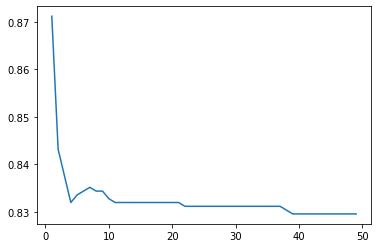

In [95]:
plt.plot(range(1,50),scores)

In [96]:
knn= KNeighborsClassifier(n_neighbors=op_k1)

In [97]:
knn.fit(oversampled_X,oversampled_Y)

KNeighborsClassifier(n_neighbors=1)

In [98]:
y_pred_test_new1=NNH.predict(oversampled_X) 

In [99]:
print(metrics.classification_report(oversampled_Y,y_pred_test_new1))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      3399
         1.0       0.90      0.99      0.94      3399

    accuracy                           0.94      6798
   macro avg       0.94      0.94      0.94      6798
weighted avg       0.94      0.94      0.94      6798



From KNN method the precision and recall is better before tuning the data and the evidence for the same is shown above


From both KNN and SVM:
In KNN method data before tuning(Hyperparamete )is better model as recall and precision is good
IN SVM model after tuning is better